In [1]:
%matplotlib inline
import sys
import os
import csv
import json
import logging
from pathlib import Path
import random
import tarfile
import tempfile
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.graph_objects as go
sys.path.append(str(Path.cwd().parent))

In [2]:
dataset = Path.cwd().parent/"input/multi-tags-results/Multi_model_results_tags.csv"

In [3]:
Multi_dataset = pd.read_csv(dataset)

In [4]:
Multi_dataset

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,1,0.949035,Disable,multi,handjobs sold seperately
1,37405,1,1,0.790196,Women,multi,introducing fidget spinner for women
2,94180,1,1,0.689591,LGBT,uni,happy pride month let's go beat up lesbians
3,54321,1,1,0.698236,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,1,0.993769,Musulman,multi,finds out those 72 virgins.. are goats
...,...,...,...,...,...,...,...
995,3869,0,0,0.000301,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.000613,Not Applicable,uni,sea monkeys
997,56280,0,1,0.995270,Not Applicable,multi,little miss muffet sat on her tuffet
998,29384,0,0,0.020082,Not Applicable,multi,they're in a row


# Looking at the number of sample:

Hateful (1) or Note Hateful (0)

In [5]:
not_hateful_labels = Multi_dataset[Multi_dataset['True Label'] == 0]
hateful_labels = Multi_dataset[Multi_dataset['True Label'] == 1]

In [6]:
numb_not_hateful_labels = len(not_hateful_labels)
numb_hateful_labels = len(hateful_labels)

print("Number of none hateful samples in the dataset: ", numb_not_hateful_labels)
print("Number of hateful samples in the dataset: ",numb_hateful_labels)

Number of none hateful samples in the dataset:  501
Number of hateful samples in the dataset:  499


Uni or Multi

In [7]:
multi_sample = Multi_dataset[Multi_dataset['Multi/Uni'] == 'multi']
uni_sample = Multi_dataset[Multi_dataset['Multi/Uni'] == 'uni']

In [8]:
numb_multi_sample = len(multi_sample)
numb_uni_sample = len(uni_sample)

print("Number of multimodal samples in the dataset: ", numb_multi_sample)
print("Number of unimodal samples in the dataset: ", numb_uni_sample)

Number of multimodal samples in the dataset:  724
Number of unimodal samples in the dataset:  275


How many Hateful and not Hateful samples than are also multimodal sample?

In [9]:
Multi_and_0 = len(multi_sample[multi_sample['True Label'] == 0])
Multi_and_1= len(multi_sample[multi_sample['True Label'] == 1])

multi_labels = {
'Multi and 0' : Multi_and_0,
'Multi and 1': Multi_and_1}

multi_labels

{'Multi and 0': 295, 'Multi and 1': 429}

How many Hateful and not Hateful samples than are also unimodal sample?


In [10]:
Uni_and_0 = len(uni_sample[uni_sample['True Label'] == 0])
Uni_and_1= len(uni_sample[uni_sample['True Label'] == 1])

uni_labels = {
'Uni and 0' : Uni_and_0,
'Uni and 1': Uni_and_1}

uni_labels

{'Uni and 0': 205, 'Uni and 1': 70}

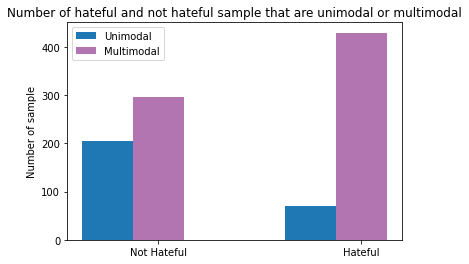

In [11]:
N = 2
ind = np.arange(N) 
width = 0.25
  
xvals = [Uni_and_0, Uni_and_1]
bar1 = plt.bar(ind, xvals, width, color = 'tab:blue')
  
yvals = [Multi_and_0, Multi_and_1]
bar2 = plt.bar(ind+width, yvals, width, color=(0.5,0.1,0.5,0.6))
  
  
plt.ylabel('Number of sample')
plt.title("Number of hateful and not hateful sample that are unimodal or multimodal")
  
plt.xticks(ind+width,['Not Hateful', 'Hateful'])
plt.legend( (bar1, bar2), ('Unimodal', 'Multimodal') )
plt.show()

# For each category 

* Disable
* Women
* LGBT
* Black
* Musulman
* Fake News
* N/A
* Inciting Violence
* Transgender
* Ginger
* Immigrant
* Jewish
* People of Color
* White
* Indian
* Japanese
* Chinese 
* Asian
* Politic
* German
* Romania
* Christian

In [12]:
Disable_sample = Multi_dataset[Multi_dataset['Community'] == 'Disable']
Women_sample = Multi_dataset[Multi_dataset['Community'] == 'Women']
LGBT_sample = Multi_dataset[Multi_dataset['Community'] == 'LGBT']
Black_sample = Multi_dataset[Multi_dataset['Community'] == 'Black']
Musulman_sample = Multi_dataset[Multi_dataset['Community'] == 'Musulman']
FakeNews_sample = Multi_dataset[Multi_dataset['Community'] == 'Fake News']
NA_sample = Multi_dataset[Multi_dataset['Community'] == 'Not Applicable']
IncitingViolence_sample = Multi_dataset[Multi_dataset['Community'] == 'Inciting Violence']
Transgender_sample = Multi_dataset[Multi_dataset['Community'] == 'Transgender']
Ginger_sample = Multi_dataset[Multi_dataset['Community'] == 'Ginger']
Immigrant_sample = Multi_dataset[Multi_dataset['Community'] == 'Immigrant']
Jewish_sample = Multi_dataset[Multi_dataset['Community'] == 'Jewish']
PeopleofColor_sample = Multi_dataset[Multi_dataset['Community'] == 'People of Color']
White_sample = Multi_dataset[Multi_dataset['Community'] == 'White']
Indian_sample = Multi_dataset[Multi_dataset['Community'] == 'Indian']
Japanese_sample = Multi_dataset[Multi_dataset['Community'] == 'Japanese']
Chinese_sample = Multi_dataset[Multi_dataset['Community'] == 'Chinese']
Asian_sample = Multi_dataset[Multi_dataset['Community'] == 'Asian']
Politic_sample = Multi_dataset[Multi_dataset['Community'] == 'Politic']
German_sample = Multi_dataset[Multi_dataset['Community'] == 'German']
Romanian_sample = Multi_dataset[Multi_dataset['Community'] == 'Romania']
Christian_sample = Multi_dataset[Multi_dataset['Community'] == 'Christian']

In [13]:
Romanian_sample

,id,True Label,Label,Proba,Community,Multi/Uni,Text
671,97568,1,1,0.769319,Romania,multi,how to cook turkey in usa how to cook turkey i...
784,38496,1,0,0.235308,Romania,multi,romanians when they see a slightly open purse/...
811,10748,1,0,0.000105,Romania,multi,can afford to travel from romania to london st...


In [14]:
numb_Disable_sample = len(Disable_sample)
numb_Women_sample = len(Women_sample)
numb_LGBT_sample = len(LGBT_sample)
numb_Black_sample = len(Black_sample)
numb_Musulman_sample = len(Musulman_sample)
numb_FakeNews_sample = len(FakeNews_sample)
numb_NA_sample = len(NA_sample)
numb_IncitingViolence_sample = len(IncitingViolence_sample)
numb_Transgender_sample = len(Transgender_sample)
numb_German_sample = len(Ginger_sample)
numb_Immigrant_sample = len(Immigrant_sample)
numb_Jewish_sample = len(Jewish_sample)
numb_PeopleofColor_sample = len(PeopleofColor_sample)
numb_White_sample = len(White_sample)
numb_Indian_sample = len(Indian_sample)
numb_Japanese_sample = len(Japanese_sample)
numb_Chinese_sample = len(Chinese_sample)
numb_Asian_sample = len(Asian_sample)
numb_Politic_sample = len(Politic_sample)
numb_German_sample = len(German_sample)
numb_Romanian_sample = len(Romanian_sample)
numb_Christian_sample = len(Christian_sample)

Text(0, 0.5, 'number of sample')

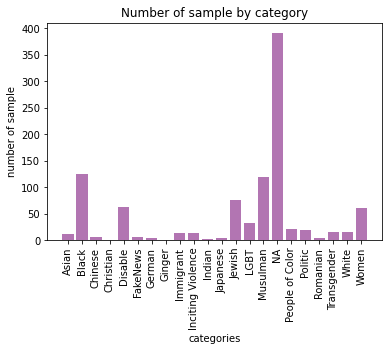

In [15]:
categories_ = {
'Disable' : len(Disable_sample),
'Women' : len(Women_sample),
'LGBT' : len(LGBT_sample),
'Black' : len(Black_sample),
'Musulman' : len(Musulman_sample),
'FakeNews' : len(FakeNews_sample),
'NA' : len(NA_sample),
'Inciting Violence' : len(IncitingViolence_sample),
'Transgender' : len(Transgender_sample),
'Ginger' : len(Ginger_sample),
'Immigrant' : len(Immigrant_sample),
'Jewish' : len(Jewish_sample),
'People of Color' : len(PeopleofColor_sample),
'White' : len(White_sample),
'Indian' : len(Indian_sample),
'Japanese' : len(Japanese_sample),
'Chinese' : len(Chinese_sample),
'Asian' : len(Asian_sample),
'Politic' : len(Politic_sample),
'German' : len(German_sample),
'Romanian' : len(Romanian_sample),
'Christian' : len(Christian_sample)
}

lists = sorted(categories_.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [16]:
categories_

{'Disable': 62,
 'Women': 60,
 'LGBT': 32,
 'Black': 125,
 'Musulman': 119,
 'FakeNews': 6,
 'NA': 391,
 'Inciting Violence': 14,
 'Transgender': 15,
 'Ginger': 1,
 'Immigrant': 13,
 'Jewish': 75,
 'People of Color': 21,
 'White': 15,
 'Indian': 2,
 'Japanese': 3,
 'Chinese': 6,
 'Asian': 11,
 'Politic': 19,
 'German': 3,
 'Romanian': 3,
 'Christian': 1}

In [17]:
OtherThanNA_sample = Multi_dataset[Multi_dataset['Community'] != 'Not Applicable']

Text(0, 0.5, 'number of sample')

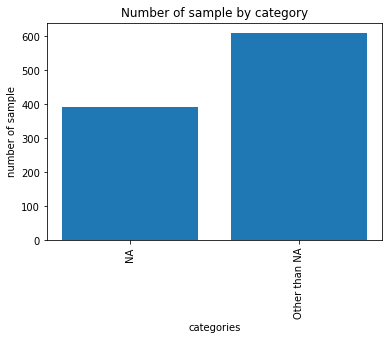

In [18]:
bi_cat = {
    'NA' : len(NA_sample),
    'Other than NA' : len(OtherThanNA_sample)
}

lists = sorted(bi_cat.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
plt.bar(categories, numb_of_sample, color="tab:blue")
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Hateful by community 

In [19]:
Disable_sample_h = hateful_labels[hateful_labels['Community'] == 'Disable']
Women_sample_h = hateful_labels[hateful_labels['Community'] == 'Women']
LGBT_sample_h = hateful_labels[hateful_labels['Community'] == 'LGBT']
Black_sample_h = hateful_labels[hateful_labels['Community'] == 'Black']
Musulman_sample_h = hateful_labels[hateful_labels['Community'] == 'Musulman']
FakeNews_sample_h = hateful_labels[hateful_labels['Community'] == 'Fake News']
NA_sample_h = hateful_labels[hateful_labels['Community'] == 'Not Applicable']
IncitingViolence_sample_h = hateful_labels[hateful_labels['Community'] == 'Inciting Violence']
Transgender_sample_h = hateful_labels[hateful_labels['Community'] == 'Transgender']
Ginger_sample_h = hateful_labels[hateful_labels['Community'] == 'Ginger']
Immigrant_sample_h = hateful_labels[hateful_labels['Community'] == 'Immigrant']
Jewish_sample_h = hateful_labels[hateful_labels['Community'] == 'Jewish']
PeopleofColor_sample_h = hateful_labels[hateful_labels['Community'] == 'People of Color']
White_sample_h = hateful_labels[hateful_labels['Community'] == 'White']
Indian_sample_h = hateful_labels[hateful_labels['Community'] == 'Indian']
Japanese_sample_h = hateful_labels[hateful_labels['Community'] == 'Japanese']
Chinese_sample_h = hateful_labels[hateful_labels['Community'] == 'Chinese']
Asian_sample_h = hateful_labels[hateful_labels['Community'] == 'Asian']
Politic_sample_h = hateful_labels[hateful_labels['Community'] == 'Politic']
German_sample_h = hateful_labels[hateful_labels['Community'] == 'German']
Romanian_sample_h = hateful_labels[hateful_labels['Community'] == 'Romania']
Christian_sample_h = hateful_labels[hateful_labels['Community'] == 'Christian']

Text(0, 0.5, 'number of sample')

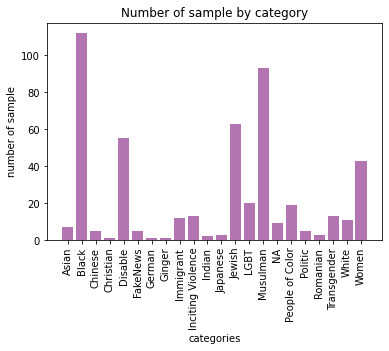

In [20]:
H_categories = {
'Disable' : len(Disable_sample_h),
'Women' : len(Women_sample_h),
'LGBT' : len(LGBT_sample_h),
'Black' : len(Black_sample_h),
'Musulman' : len(Musulman_sample_h),
'FakeNews' : len(FakeNews_sample_h),
'NA' : len(NA_sample_h),
'Inciting Violence' : len(IncitingViolence_sample_h),
'Transgender' : len(Transgender_sample_h),
'Ginger' : len(Ginger_sample_h),
'Immigrant' : len(Immigrant_sample_h),
'Jewish' : len(Jewish_sample_h),
'People of Color' : len(PeopleofColor_sample_h),
'White' : len(White_sample_h),
'Indian' : len(Indian_sample_h),
'Japanese' : len(Japanese_sample_h),
'Chinese' : len(Chinese_sample_h),
'Asian' : len(Asian_sample_h),
'Politic' : len(Politic_sample_h),
'German' : len(German_sample_h),
'Romanian' : len(Romanian_sample_h),
'Christian' : len(Christian_sample_h)
}

lists = sorted(H_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Not Hateful by community 

In [21]:
Disable_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Disable']
Women_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Women']
LGBT_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'LGBT']
Black_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Black']
Musulman_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Musulman']
FakeNews_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Fake News']
NA_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Not Applicable']
IncitingViolence_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Inciting Violence']
Transgender_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Transgender']
Ginger_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Ginger']
Immigrant_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Immigrant']
Jewish_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Jewish']
PeopleofColor_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'People of Color']
White_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'White']
Indian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Indian']
Japanese_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Japanese']
Chinese_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Chinese']
Asian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Asian']
Politic_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Politic']
German_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'German']
Romanian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Romania']
Christian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Christian']

Text(0, 0.5, 'number of sample')

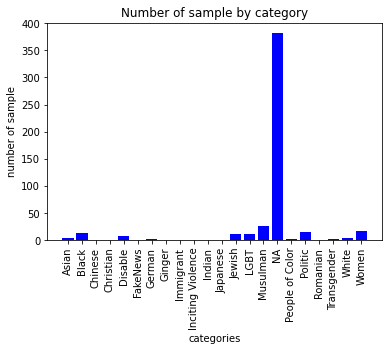

In [22]:
NH_categories = {
'Disable' : len(Disable_sample_nh),
'Women' : len(Women_sample_nh),
'LGBT' : len(LGBT_sample_nh),
'Black' : len(Black_sample_nh),
'Musulman' : len(Musulman_sample_nh),
'FakeNews' : len(FakeNews_sample_nh),
'NA' : len(NA_sample_nh),
'Inciting Violence' : len(IncitingViolence_sample_nh),
'Transgender' : len(Transgender_sample_nh),
'Ginger' : len(Ginger_sample_nh),
'Immigrant' : len(Immigrant_sample_nh),
'Jewish' : len(Jewish_sample_nh),
'People of Color' : len(PeopleofColor_sample_nh),
'White' : len(White_sample_nh),
'Indian' : len(Indian_sample_nh),
'Japanese' : len(Japanese_sample_nh),
'Chinese' : len(Chinese_sample_nh),
'Asian' : len(Asian_sample_nh),
'Politic' : len(Politic_sample_nh),
'German' : len(German_sample_nh),
'Romanian' : len(Romanian_sample_nh),
'Christian' : len(Christian_sample_nh)
}

lists = sorted(NH_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [23]:
H_categories

{'Disable': 55,
 'Women': 43,
 'LGBT': 20,
 'Black': 112,
 'Musulman': 93,
 'FakeNews': 5,
 'NA': 9,
 'Inciting Violence': 13,
 'Transgender': 13,
 'Ginger': 1,
 'Immigrant': 12,
 'Jewish': 63,
 'People of Color': 19,
 'White': 11,
 'Indian': 2,
 'Japanese': 3,
 'Chinese': 5,
 'Asian': 7,
 'Politic': 5,
 'German': 1,
 'Romanian': 3,
 'Christian': 1}

# Prediction

In [24]:
Multi_dataset

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,1,0.949035,Disable,multi,handjobs sold seperately
1,37405,1,1,0.790196,Women,multi,introducing fidget spinner for women
2,94180,1,1,0.689591,LGBT,uni,happy pride month let's go beat up lesbians
3,54321,1,1,0.698236,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,1,0.993769,Musulman,multi,finds out those 72 virgins.. are goats
...,...,...,...,...,...,...,...
995,3869,0,0,0.000301,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.000613,Not Applicable,uni,sea monkeys
997,56280,0,1,0.995270,Not Applicable,multi,little miss muffet sat on her tuffet
998,29384,0,0,0.020082,Not Applicable,multi,they're in a row


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [26]:
y_actual = list(Multi_dataset['True Label'])
pred_set = list(Multi_dataset['Label'])

In [27]:
print("AUC: ", roc_auc_score(y_actual, pred_set))

AUC:  0.5367721470885882


Text(33.0, 0.5, 'Actual labels')

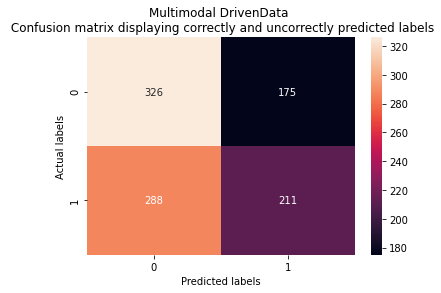

In [28]:
cf_matrix = confusion_matrix(y_actual, pred_set)

plt.title('Multimodal DrivenData \n Confusion matrix displaying correctly and uncorrectly predicted labels')
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

In [29]:
not_hateful_labels = Multi_dataset[Multi_dataset['True Label'] == 0]
hateful_labels = Multi_dataset[Multi_dataset['True Label'] == 1]

In [30]:
TP = not_hateful_labels[not_hateful_labels['Label'] == 0]
TN = hateful_labels[hateful_labels['Label'] == 1]
FP = hateful_labels[hateful_labels['Label'] == 0]
FN = not_hateful_labels[not_hateful_labels['Label'] == 1]

In [31]:
print("Number of not hateful correctly classify: ", len(TP))
print("Number of not hateful wrongly classify as hateful: ", len(FN))
print("Number of hateful correctly classify as hateful: ", len(TN))
print("Number of hateful wrongly classify as not hateful: ", len(FP))

Number of not hateful correctly classify:  326
Number of not hateful wrongly classify as hateful:  175
Number of hateful correctly classify as hateful:  211
Number of hateful wrongly classify as not hateful:  288


In [32]:
#Accuracy

Accuracy_ = (len(TP) + len(TN)) / (len(TP) + len(FP) + len(TN) + len(FN))
Accuracy_

0.537

In [33]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision = len(TN) / (len(TN) + len(FN))
print( "The precision score is:", precision)

The precision score is: 0.5466321243523317


In [34]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall = len(TN) / (len(TN) + len(FP))
print("The recall score is:", recall)

The recall score is: 0.4228456913827655


In [35]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score = (2 * precision * recall) / (precision + recall)
print("The F1 score is:", F1Score)

The F1 score is: 0.4768361581920904


In [36]:
#Accuracy on not hateful meme
acc_NHM = len(TP) / (len(TP) + len(FN)) * 100
print("Classified ", acc_NHM, "%", "of the not hateful memes")

#Accuracy on not hateful meme
acc_HM = len(TN) / (len(TN) + len(FP)) * 100
print("Classified ", acc_HM, "%", "of the hateful memes")

Classified  65.06986027944112 % of the not hateful memes
Classified  42.28456913827655 % of the hateful memes


# Exploring result in TN dataset

In [37]:
TN

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,1,0.949035,Disable,multi,handjobs sold seperately
1,37405,1,1,0.790196,Women,multi,introducing fidget spinner for women
2,94180,1,1,0.689591,LGBT,uni,happy pride month let's go beat up lesbians
3,54321,1,1,0.698236,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,1,0.993769,Musulman,multi,finds out those 72 virgins.. are goats
...,...,...,...,...,...,...,...
962,95260,1,1,0.999951,Black,multi,what's black and screams harvey price answerin...
969,93820,1,1,0.926298,LGBT,uni,we should legally be allowed to shoot fat g*y ...
980,68749,1,1,0.674431,Musulman,multi,"""my name is osama bin laden and this is jackass"""
985,94175,1,1,0.989739,Black,multi,"""we're his kids and he hasn't returned. yeah t..."


In [38]:
TN_sortedFrame = TN.sort_values("Proba", ascending=False)
TN_sortedFrame

,id,True Label,Label,Proba,Community,Multi/Uni,Text
259,9357,1,1,0.999999,Jewish,multi,"when you fart next to the jewish kid, and real..."
21,86139,1,1,0.999999,Women,multi,what do i have in common with cow pies? xxx th...
803,23694,1,1,0.999999,Musulman,uni,"""we will take over politically, oust the const..."
325,47680,1,1,0.999998,Black,multi,spiders are like him not all of them are dange...
378,73049,1,1,0.999998,Transgender,multi,i was asked who my favourite x-men character w...
...,...,...,...,...,...,...,...
323,8541,1,1,0.562129,Disable,multi,when your test comes back and you got a 47 out...
234,90814,1,1,0.539335,Black,multi,"being able to call someone ""mine"""
157,21530,1,1,0.524767,Musulman,multi,went down on a muslim bitch. her pussy was the...
927,34297,1,1,0.515690,Jewish,multi,feeling cute. might kill 6 million later...idk


In [39]:
CorCl = TN_sortedFrame[TN_sortedFrame['Community'] == 'People of Color']
CorCl.sort_values("Proba")
CorCl

,id,True Label,Label,Proba,Community,Multi/Uni,Text
48,1936,1,1,0.986847,People of Color,uni,we said we would never forget why are you voti...
324,95306,1,1,0.985908,People of Color,multi,why is it so good? because it's white
20,1865,1,1,0.973565,People of Color,uni,i'm this pretty because both my parents are white
708,76842,1,1,0.967716,People of Color,multi,these wind chimes don't make a sound should ha...
77,87039,1,1,0.962213,People of Color,multi,this makes me puke send all of them back home
761,19587,1,1,0.961765,People of Color,multi,i support terrorists because they're pea brain...
18,62134,1,1,0.888029,People of Color,multi,its not right to judge someone by the color of...
701,70214,1,1,0.685415,People of Color,multi,let's not be hasty. the worldview of the guys ...


In [40]:
multi_sample_in_TN = TN[TN['Multi/Uni'] == 'multi']
uni_sample_in_TN = TN[TN['Multi/Uni'] == 'uni']

numb_multi_sample_TN = len(multi_sample_in_TN)
numb_uni_sample_TN = len(uni_sample_in_TN)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_TN)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_TN)

Number of multimodal samples in the dataset:  182
Number of unimodal samples in the dataset:  29


Here, the model perform worse at unimodal that the BERT only model 

Text(0, 0.5, 'number of sample')

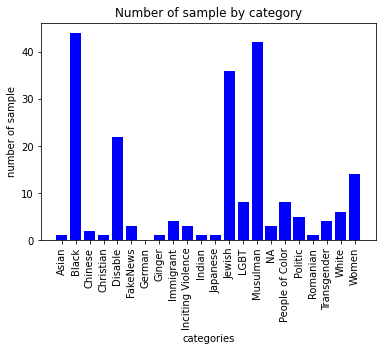

In [41]:
Disable_sample_tn = TN[TN['Community'] == 'Disable']
Women_sample_tn = TN[TN['Community'] == 'Women']
LGBT_sample_tn = TN[TN['Community'] == 'LGBT']
Black_sample_tn = TN[TN['Community'] == 'Black']
Musulman_sample_tn = TN[TN['Community'] == 'Musulman']
FakeNews_sample_tn = TN[TN['Community'] == 'Fake News']
NA_sample_tn = TN[TN['Community'] == 'Not Applicable']
IncitingViolence_sample_tn = TN[TN['Community'] == 'Inciting Violence']
Transgender_sample_tn = TN[TN['Community'] == 'Transgender']
Ginger_sample_tn = TN[TN['Community'] == 'Ginger']
Immigrant_sample_tn = TN[TN['Community'] == 'Immigrant']
Jewish_sample_tn = TN[TN['Community'] == 'Jewish']
PeopleofColor_sample_tn = TN[TN['Community'] == 'People of Color']
White_sample_tn = TN[TN['Community'] == 'White']
Indian_sample_tn = TN[TN['Community'] == 'Indian']
Japanese_sample_tn = TN[TN['Community'] == 'Japanese']
Chinese_sample_tn = TN[TN['Community'] == 'Chinese']
Asian_sample_tn = TN[TN['Community'] == 'Asian']
Politic_sample_tn = TN[TN['Community'] == 'Politic']
German_sample_tn = TN[TN['Community'] == 'German']
Romanian_sample_tn = TN[TN['Community'] == 'Romania']
Christian_sample_tn = TN[TN['Community'] == 'Christian']

TN_categories = {
'Disable' : len(Disable_sample_tn),
'Women' : len(Women_sample_tn),
'LGBT' : len(LGBT_sample_tn),
'Black' : len(Black_sample_tn),
'Musulman' : len(Musulman_sample_tn),
'FakeNews' : len(FakeNews_sample_tn),
'NA' : len(NA_sample_tn),
'Inciting Violence' : len(IncitingViolence_sample_tn),
'Transgender' : len(Transgender_sample_tn),
'Ginger' : len(Ginger_sample_tn),
'Immigrant' : len(Immigrant_sample_tn),
'Jewish' : len(Jewish_sample_tn),
'People of Color' : len(PeopleofColor_sample_tn),
'White' : len(White_sample_tn),
'Indian' : len(Indian_sample_tn),
'Japanese' : len(Japanese_sample_tn),
'Chinese' : len(Chinese_sample_tn),
'Asian' : len(Asian_sample_tn),
'Politic' : len(Politic_sample_tn),
'German' : len(German_sample_tn),
'Romanian' : len(Romanian_sample_tn),
'Christian' : len(Christian_sample_tn)
}

lists = sorted(TN_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Text(0, 0.5, 'number of sample')

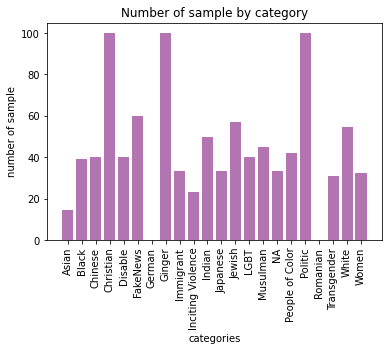

In [42]:
Acc_TN_Disable = len(Disable_sample_tn) / len(Disable_sample_h) * 100
Acc_TN_Women = len(Women_sample_tn) / len(Women_sample_h) * 100
Acc_TN_LGBT = len(LGBT_sample_tn) / len(LGBT_sample_h) * 100
Acc_TN_Black = len(Black_sample_tn) / len(Black_sample_h) * 100
Acc_TN_Musulman = len(Musulman_sample_tn) / len(Musulman_sample_h) * 100
Acc_TN_FakeNews = len(FakeNews_sample_tn) / len(FakeNews_sample_h) * 100
Acc_TN_NA = len(NA_sample_tn) / len(NA_sample_h) * 100
Acc_TN_IncitingViolence = len(IncitingViolence_sample_tn) / len(IncitingViolence_sample_h) * 100
Acc_TN_Transgender = len(Transgender_sample_tn) / len(Transgender_sample_h) * 100
Acc_TN_Ginger = len(Ginger_sample_tn) / len(Ginger_sample_h) * 100
Acc_TN_Immigrant = len(Immigrant_sample_tn) / len(Immigrant_sample_h) * 100
Acc_TN_Jewish = len(Jewish_sample_tn) / len(Jewish_sample_h) * 100
Acc_TN_PeopleofColor = len(PeopleofColor_sample_tn) / len(PeopleofColor_sample_h) * 100
Acc_TN_White = len(White_sample_tn) / len(White_sample_h) * 100
Acc_TN_Indian = len(Indian_sample_tn) / len(Indian_sample_h) * 100
Acc_TN_Japanese = len(Japanese_sample_tn) / len(Japanese_sample_h) * 100
Acc_TN_Chinese = len(Chinese_sample_tn) / len(Chinese_sample_h) * 100
Acc_TN_Asian = len(Asian_sample_tn) / len(Asian_sample_h) * 100
Acc_TN_Politic = len(Politic_sample_tn) / len(Politic_sample_h) * 100
Acc_TN_German = len(German_sample_tn) / len(German_sample_h) * 100
Acc_TN_Romanian = 0
Acc_TN_Christian = len(Christian_sample_tn) / len(Christian_sample_h) * 100


Acc_TN_categories = {
'Disable' : Acc_TN_Disable,
'Women' : Acc_TN_Women,
'LGBT' : Acc_TN_LGBT,
'Black' : Acc_TN_Black,
'Musulman' : Acc_TN_Musulman,
'FakeNews' : Acc_TN_FakeNews,
'NA' : Acc_TN_NA,
'Inciting Violence' : Acc_TN_IncitingViolence,
'Transgender' : Acc_TN_Transgender,
'Ginger' : Acc_TN_Ginger,
'Immigrant' : Acc_TN_Immigrant,
'Jewish' : Acc_TN_Jewish,
'People of Color' : Acc_TN_PeopleofColor,
'White' : Acc_TN_White,
'Indian' : Acc_TN_Indian,
'Japanese' : Acc_TN_Japanese,
'Chinese' : Acc_TN_Chinese,
'Asian' : Acc_TN_Asian,
'Politic' : Acc_TN_Politic,
'German' : Acc_TN_German,
'Romanian' : Acc_TN_Romanian,
'Christian' : Acc_TN_Christian
}

lists = sorted(Acc_TN_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [43]:
for key, value in Acc_TN_categories.items():
    print(key, ':', value, '%')

Disable : 40.0 %
Women : 32.55813953488372 %
LGBT : 40.0 %
Black : 39.285714285714285 %
Musulman : 45.16129032258064 %
FakeNews : 60.0 %
NA : 33.33333333333333 %
Inciting Violence : 23.076923076923077 %
Transgender : 30.76923076923077 %
Ginger : 100.0 %
Immigrant : 33.33333333333333 %
Jewish : 57.14285714285714 %
People of Color : 42.10526315789473 %
White : 54.54545454545454 %
Indian : 50.0 %
Japanese : 33.33333333333333 %
Chinese : 40.0 %
Asian : 14.285714285714285 %
Politic : 100.0 %
German : 0.0 %
Romanian : 0 %
Christian : 100.0 %


# Exploring result in FP dataset

In [44]:
FP

,id,True Label,Label,Proba,Community,Multi/Uni,Text
5,73506,1,0,0.001667,Musulman,multi,look your dad fucked goats.. i capped him...so...
8,69421,1,0,0.000881,Inciting Violence,multi,when they laugh about your 9cm in the change r...
9,50162,1,0,0.000016,Black,multi,"roses are black, violets are black everything ..."
10,43728,1,0,0.000090,Transgender,multi,bruce jenner's cat
12,47829,1,0,0.000610,Musulman,multi,when you found your wife is cheating on you ya...
...,...,...,...,...,...,...,...
988,10234,1,0,0.000234,Black,multi,when you've decided to start a life of crime
989,65948,1,0,0.016618,LGBT,multi,me watching the pride parade
990,86173,1,0,0.048430,Disable,multi,when i said i wanted a little pussy this is no...
991,50839,1,0,0.173014,Musulman,multi,"""you think i'm a terrorist but i identify as a..."


In [45]:
FP_sortedFrame = FP.sort_values("Proba")
FP_sortedFrame.head(20)

,id,True Label,Label,Proba,Community,Multi/Uni,Text
429,3765,1,0,5.190000e-18,Inciting Violence,uni,american kids all across american storefronts!...
164,24689,1,0,2.630000e-11,Black,multi,old barack obama
497,10475,1,0,1.920000e-10,Immigrant,multi,refugees welcome
714,18750,1,0,2.020000e-10,Disable,multi,turn for what
247,65734,1,0,1.540000e-09,Black,multi,"aye, tone! why would dey delouse 'em if dey wa..."
129,17285,1,0,2.600000e-08,Disable,multi,slow cooker
38,63491,1,0,5.630000e-08,Musulman,multi,when you've just realised your son has taken t...
593,89571,1,0,1.180000e-07,People of Color,multi,don't defile the lineage given to you by your ...
498,91736,1,0,1.340000e-07,Chinese,multi,"mainlanders, they are eat dogs, they do"
605,17869,1,0,1.770000e-07,Disable,multi,party tonight? i'm down


In [46]:
MissCl = FP_sortedFrame[FP_sortedFrame['Community'] == 'Women']
MissCl.sort_values("Proba")
MissCl

,id,True Label,Label,Proba,Community,Multi/Uni,Text
456,80321,1,0,6.090000e-07,Women,multi,within these places they should be staying jun...
597,21849,1,0,3.470000e-06,Women,multi,march 8th international women's day
171,80713,1,0,8.080000e-06,Women,multi,rare picture of child birth
13,35279,1,0,5.350000e-05,Women,multi,when you convert your dishwasher into a weed e...
799,96581,1,0,5.055180e-04,Women,multi,"""if a dishwasher wore pants, would it wear the..."
206,64803,1,0,7.357490e-04,Women,multi,when she asked for equal rights so i gave her ...
155,6931,1,0,1.155491e-03,Women,multi,the newest hate group the dumb stupid klan
947,67350,1,0,1.173907e-03,Women,multi,turn your dishwasher into a snow remover
636,60193,1,0,1.957022e-03,Women,multi,would ya look at that this dryer comes with a ...
300,48956,1,0,4.765443e-03,Women,multi,he won because he is a boy competing in a fema...


In [47]:
multi_sample_in_FP = FP[FP['Multi/Uni'] == 'multi']
uni_sample_in_FP = FP[FP['Multi/Uni'] == 'uni']

numb_multi_sample_FP = len(multi_sample_in_FP)
numb_uni_sample_FP = len(uni_sample_in_FP)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_FP)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_FP)

Number of multimodal samples in the dataset:  247
Number of unimodal samples in the dataset:  41


Text(0, 0.5, 'number of sample')

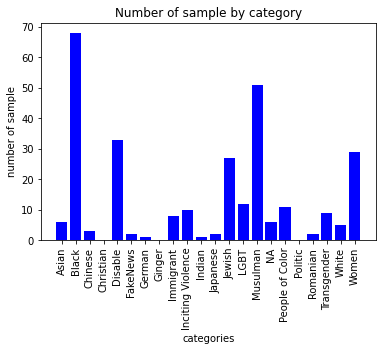

In [48]:
Disable_sample_FP = FP[FP['Community'] == 'Disable']
Women_sample_FP = FP[FP['Community'] == 'Women']
LGBT_sample_FP = FP[FP['Community'] == 'LGBT']
Black_sample_FP = FP[FP['Community'] == 'Black']
Musulman_sample_FP = FP[FP['Community'] == 'Musulman']
FakeNews_sample_FP = FP[FP['Community'] == 'Fake News']
NA_sample_FP = FP[FP['Community'] == 'Not Applicable']
IncitingViolence_sample_FP = FP[FP['Community'] == 'Inciting Violence']
Transgender_sample_FP = FP[FP['Community'] == 'Transgender']
Ginger_sample_FP = FP[FP['Community'] == 'Ginger']
Immigrant_sample_FP = FP[FP['Community'] == 'Immigrant']
Jewish_sample_FP = FP[FP['Community'] == 'Jewish']
PeopleofColor_sample_FP = FP[FP['Community'] == 'People of Color']
White_sample_FP = FP[FP['Community'] == 'White']
Indian_sample_FP = FP[FP['Community'] == 'Indian']
Japanese_sample_FP = FP[FP['Community'] == 'Japanese']
Chinese_sample_FP = FP[FP['Community'] == 'Chinese']
Asian_sample_FP = FP[FP['Community'] == 'Asian']
Politic_sample_FP = FP[FP['Community'] == 'Politic']
German_sample_FP = FP[FP['Community'] == 'German']
Romanian_sample_FP = FP[FP['Community'] == 'Romania']
Christian_sample_FP = FP[FP['Community'] == 'Christian']

FP_categories = {
'Disable' : len(Disable_sample_FP),
'Women' : len(Women_sample_FP),
'LGBT' : len(LGBT_sample_FP),
'Black' : len(Black_sample_FP),
'Musulman' : len(Musulman_sample_FP),
'FakeNews' : len(FakeNews_sample_FP),
'NA' : len(NA_sample_FP),
'Inciting Violence' : len(IncitingViolence_sample_FP),
'Transgender' : len(Transgender_sample_FP),
'Ginger' : len(Ginger_sample_FP),
'Immigrant' : len(Immigrant_sample_FP),
'Jewish' : len(Jewish_sample_FP),
'People of Color' : len(PeopleofColor_sample_FP),
'White' : len(White_sample_FP),
'Indian' : len(Indian_sample_FP),
'Japanese' : len(Japanese_sample_FP),
'Chinese' : len(Chinese_sample_FP),
'Asian' : len(Asian_sample_FP),
'Politic' : len(Politic_sample_FP),
'German' : len(German_sample_FP),
'Romanian' : len(Romanian_sample_FP),
'Christian' : len(Christian_sample_FP)
}

lists = sorted(FP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Text(0, 0.5, 'number of sample')

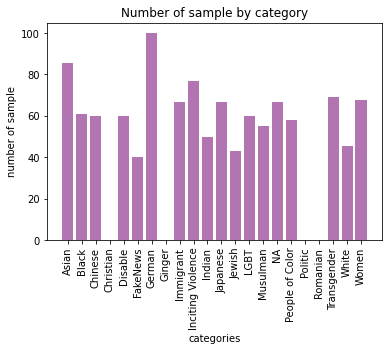

In [49]:
Acc_FP_Disable = len(Disable_sample_FP) / len(Disable_sample_h) * 100
Acc_FP_Women = len(Women_sample_FP) / len(Women_sample_h) * 100
Acc_FP_LGBT = len(LGBT_sample_FP) / len(LGBT_sample_h) * 100
Acc_FP_Black = len(Black_sample_FP) / len(Black_sample_h) * 100
Acc_FP_Musulman = len(Musulman_sample_FP) / len(Musulman_sample_h) * 100
Acc_FP_FakeNews = len(FakeNews_sample_FP) / len(FakeNews_sample_h) * 100
Acc_FP_NA = len(NA_sample_FP) / len(NA_sample_h) * 100
Acc_FP_IncitingViolence = len(IncitingViolence_sample_FP) / len(IncitingViolence_sample_h) * 100
Acc_FP_Transgender = len(Transgender_sample_FP) / len(Transgender_sample_h) * 100
Acc_FP_Ginger = len(Ginger_sample_FP) / len(Ginger_sample_h) * 100
Acc_FP_Immigrant = len(Immigrant_sample_FP) / len(Immigrant_sample_h) * 100
Acc_FP_Jewish = len(Jewish_sample_FP) / len(Jewish_sample_h) * 100
Acc_FP_PeopleofColor = len(PeopleofColor_sample_FP) / len(PeopleofColor_sample_h) * 100
Acc_FP_White = len(White_sample_FP) / len(White_sample_h) * 100
Acc_FP_Indian = len(Indian_sample_FP) / len(Indian_sample_h) * 100
Acc_FP_Japanese = len(Japanese_sample_FP) / len(Japanese_sample_h) * 100
Acc_FP_Chinese = len(Chinese_sample_FP) / len(Chinese_sample_h) * 100
Acc_FP_Asian = len(Asian_sample_FP) / len(Asian_sample_h) * 100
Acc_FP_Politic = len(Politic_sample_FP) / len(Politic_sample_h) * 100
Acc_FP_German = len(German_sample_FP) / len(German_sample_h) * 100
Acc_FP_Romanian = 0
Acc_FP_Christian = len(Christian_sample_FP) / len(Christian_sample_h) * 100


Acc_FP_categories = {
'Disable' : Acc_FP_Disable,
'Women' : Acc_FP_Women,
'LGBT' : Acc_FP_LGBT,
'Black' : Acc_FP_Black,
'Musulman' : Acc_FP_Musulman,
'FakeNews' : Acc_FP_FakeNews,
'NA' : Acc_FP_NA,
'Inciting Violence' : Acc_FP_IncitingViolence,
'Transgender' : Acc_FP_Transgender,
'Ginger' : Acc_FP_Ginger,
'Immigrant' : Acc_FP_Immigrant,
'Jewish' : Acc_FP_Jewish,
'People of Color' : Acc_FP_PeopleofColor,
'White' : Acc_FP_White,
'Indian' : Acc_FP_Indian,
'Japanese' : Acc_FP_Japanese,
'Chinese' : Acc_FP_Chinese,
'Asian' : Acc_FP_Asian,
'Politic' : Acc_FP_Politic,
'German' : Acc_FP_German,
'Romanian' : Acc_FP_Romanian,
'Christian' : Acc_FP_Christian
}

lists = sorted(Acc_FP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [50]:
for key, value in Acc_FP_categories.items():
    print("Fail on", key, 'at', value, '%')

Fail on Disable at 60.0 %
Fail on Women at 67.44186046511628 %
Fail on LGBT at 60.0 %
Fail on Black at 60.71428571428571 %
Fail on Musulman at 54.83870967741935 %
Fail on FakeNews at 40.0 %
Fail on NA at 66.66666666666666 %
Fail on Inciting Violence at 76.92307692307693 %
Fail on Transgender at 69.23076923076923 %
Fail on Ginger at 0.0 %
Fail on Immigrant at 66.66666666666666 %
Fail on Jewish at 42.857142857142854 %
Fail on People of Color at 57.89473684210527 %
Fail on White at 45.45454545454545 %
Fail on Indian at 50.0 %
Fail on Japanese at 66.66666666666666 %
Fail on Chinese at 60.0 %
Fail on Asian at 85.71428571428571 %
Fail on Politic at 0.0 %
Fail on German at 100.0 %
Fail on Romanian at 0 %
Fail on Christian at 0.0 %


# Exploring result in TP dataset

In [51]:
TP

,id,True Label,Label,Proba,Community,Multi/Uni,Text
7,70691,0,0,0.000009,Not Applicable,Uni,overdose
46,52971,0,0,0.002404,LGBT,multi,that's a man baby!
51,24973,0,0,0.000780,Not Applicable,uni,in england they drive on the left in canada we...
58,18239,0,0,0.000378,Not Applicable,multi,orange is the new black
60,59167,0,0,0.000765,Not Applicable,multi,"i'm not racist, but... racist memes are allowe..."
...,...,...,...,...,...,...,...
987,13890,0,0,0.074726,Not Applicable,multi,when this said it would be dry this wasn't wha...
994,79405,0,0,0.049045,Musulman,multi,congress is now stronger than ever to fight te...
995,3869,0,0,0.000301,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.000613,Not Applicable,uni,sea monkeys


In [52]:
multi_sample_in_TP = TP[TP['Multi/Uni'] == 'multi']
uni_sample_in_TP = TP[TP['Multi/Uni'] == 'uni']

numb_multi_sample_TP = len(multi_sample_in_TP)
numb_uni_sample_TP = len(uni_sample_in_TP)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_TP)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_TP)

Number of multimodal samples in the dataset:  192
Number of unimodal samples in the dataset:  133


Text(0, 0.5, 'number of sample')

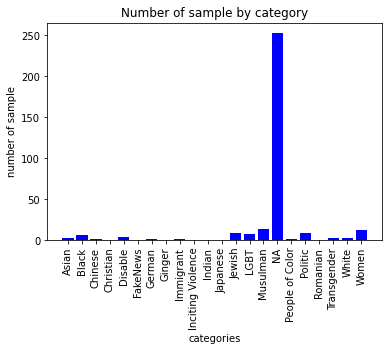

In [53]:
Disable_sample_TP = TP[TP['Community'] == 'Disable']
Women_sample_TP = TP[TP['Community'] == 'Women']
LGBT_sample_TP = TP[TP['Community'] == 'LGBT']
Black_sample_TP = TP[TP['Community'] == 'Black']
Musulman_sample_TP = TP[TP['Community'] == 'Musulman']
FakeNews_sample_TP = TP[TP['Community'] == 'Fake News']
NA_sample_TP = TP[TP['Community'] == 'Not Applicable']
IncitingViolence_sample_TP = TP[TP['Community'] == 'Inciting Violence']
Transgender_sample_TP = TP[TP['Community'] == 'Transgender']
Ginger_sample_TP = TP[TP['Community'] == 'Ginger']
Immigrant_sample_TP = TP[TP['Community'] == 'Immigrant']
Jewish_sample_TP = TP[TP['Community'] == 'Jewish']
PeopleofColor_sample_TP = TP[TP['Community'] == 'People of Color']
White_sample_TP = TP[TP['Community'] == 'White']
Indian_sample_TP = TP[TP['Community'] == 'Indian']
Japanese_sample_TP = TP[TP['Community'] == 'Japanese']
Chinese_sample_TP = TP[TP['Community'] == 'Chinese']
Asian_sample_TP = TP[TP['Community'] == 'Asian']
Politic_sample_TP = TP[TP['Community'] == 'Politic']
German_sample_TP = TP[TP['Community'] == 'German']
Romanian_sample_TP = TP[TP['Community'] == 'Romania']
Christian_sample_TP = TP[TP['Community'] == 'Christian']

TP_categories = {
'Disable' : len(Disable_sample_TP),
'Women' : len(Women_sample_TP),
'LGBT' : len(LGBT_sample_TP),
'Black' : len(Black_sample_TP),
'Musulman' : len(Musulman_sample_TP),
'FakeNews' : len(FakeNews_sample_TP),
'NA' : len(NA_sample_TP),
'Inciting Violence' : len(IncitingViolence_sample_TP),
'Transgender' : len(Transgender_sample_TP),
'Ginger' : len(Ginger_sample_TP),
'Immigrant' : len(Immigrant_sample_TP),
'Jewish' : len(Jewish_sample_TP),
'People of Color' : len(PeopleofColor_sample_TP),
'White' : len(White_sample_TP),
'Indian' : len(Indian_sample_TP),
'Japanese' : len(Japanese_sample_TP),
'Chinese' : len(Chinese_sample_TP),
'Asian' : len(Asian_sample_TP),
'Politic' : len(Politic_sample_TP),
'German' : len(German_sample_TP),
'Romanian' : len(Romanian_sample_TP),
'Christian' : len(Christian_sample_TP)
}

lists = sorted(TP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [54]:
Japanese_sample_TP

,id,True Label,Label,Proba,Community,Multi/Uni,Text


Text(0, 0.5, 'number of sample')

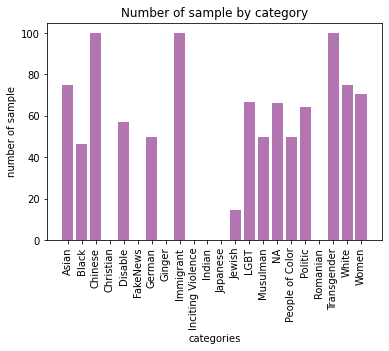

In [55]:
Acc_TP_Disable = len(Disable_sample_TP) / len(Disable_sample_nh) * 100
Acc_TP_Women = len(Women_sample_TP) / len(Women_sample_nh) * 100
Acc_TP_LGBT = len(LGBT_sample_TP) / len(LGBT_sample_nh) * 100
Acc_TP_Black = len(Black_sample_TP) / len(Black_sample_nh) * 100
Acc_TP_Musulman = len(Musulman_sample_TP) / len(Musulman_sample_nh) * 100
Acc_TP_FakeNews = len(FakeNews_sample_TP) / len(FakeNews_sample_nh) * 100
Acc_TP_NA = len(NA_sample_TP) / len(NA_sample_nh) * 100
Acc_TP_IncitingViolence = len(IncitingViolence_sample_TP) / len(IncitingViolence_sample_nh) * 100
Acc_TP_Transgender = len(Transgender_sample_TP) / len(Transgender_sample_nh) * 100
Acc_TP_Ginger = 0
Acc_TP_Immigrant = len(Immigrant_sample_TP) / len(Immigrant_sample_nh) * 100
Acc_TP_Jewish = len(Jewish_sample_TP) / len(Jewish_sample_h) * 100
Acc_TP_PeopleofColor = len(PeopleofColor_sample_TP) / len(PeopleofColor_sample_nh) * 100
Acc_TP_White = len(White_sample_TP) / len(White_sample_nh) * 100
Acc_TP_Indian = 0
Acc_TP_Japanese = 0
Acc_TP_Chinese = len(Chinese_sample_TP) / len(Chinese_sample_nh) * 100
Acc_TP_Asian = len(Asian_sample_TP) / len(Asian_sample_nh) * 100
Acc_TP_Politic = len(Politic_sample_TP) / len(Politic_sample_nh) * 100
Acc_TP_German = len(German_sample_TP) / len(German_sample_nh) * 100
Acc_TP_Romanian = 0
Acc_TP_Christian = 0


Acc_TP_categories = {
'Disable' : Acc_TP_Disable,
'Women' : Acc_TP_Women,
'LGBT' : Acc_TP_LGBT,
'Black' : Acc_TP_Black,
'Musulman' : Acc_TP_Musulman,
'FakeNews' : Acc_TP_FakeNews,
'NA' : Acc_TP_NA,
'Inciting Violence' : Acc_TP_IncitingViolence,
'Transgender' : Acc_TP_Transgender,
'Ginger' : Acc_TP_Ginger,
'Immigrant' : Acc_TP_Immigrant,
'Jewish' : Acc_TP_Jewish,
'People of Color' : Acc_TP_PeopleofColor,
'White' : Acc_TP_White,
'Indian' : Acc_TP_Indian,
'Japanese' : Acc_TP_Japanese,
'Chinese' : Acc_TP_Chinese,
'Asian' : Acc_TP_Asian,
'Politic' : Acc_TP_Politic,
'German' : Acc_TP_German,
'Romanian' : Acc_TP_Romanian,
'Christian' : Acc_TP_Christian
}

lists = sorted(Acc_TP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [56]:
for key, value in Acc_TP_categories.items():
    print(key, ':', value, '%')

Disable : 57.14285714285714 %
Women : 70.58823529411765 %
LGBT : 66.66666666666666 %
Black : 46.15384615384615 %
Musulman : 50.0 %
FakeNews : 0.0 %
NA : 66.2303664921466 %
Inciting Violence : 0.0 %
Transgender : 100.0 %
Ginger : 0 %
Immigrant : 100.0 %
Jewish : 14.285714285714285 %
People of Color : 50.0 %
White : 75.0 %
Indian : 0 %
Japanese : 0 %
Chinese : 100.0 %
Asian : 75.0 %
Politic : 64.28571428571429 %
German : 50.0 %
Romanian : 0 %
Christian : 0 %


# Women F1 Score

In [57]:
lenght_women_TN = len(TN[TN["Community"] == "Women"])
lenght_women_FN = len(FN[FN["Community"] == "Women"])
lenght_women_FP = len(FP[FP["Community"] == "Women"])

In [58]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_women = lenght_women_TN / (lenght_women_TN + lenght_women_FN)
print( "The precision score is:", precision_women)

The precision score is: 0.7368421052631579


In [59]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_women = lenght_women_TN / (lenght_women_TN + lenght_women_FP)
print("The recall score is:", recall_women)

The recall score is: 0.32558139534883723


In [60]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_women = (2 * precision_women * recall_women) / (precision_women + recall_women)
print("The Women F1 score is:", F1Score_women)

The Women F1 score is: 0.45161290322580644


# Disable F1 Score

In [61]:
lenght_Disable_TN = len(TN[TN["Community"] == "Disable"])
lenght_Disable_FN = len(FN[FN["Community"] == "Disable"])
lenght_Disable_FP = len(FP[FP["Community"] == "Disable"])

In [62]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_disable = lenght_Disable_TN / (lenght_Disable_TN + lenght_Disable_FN)
print( "The precision score is:", precision_disable)

The precision score is: 0.88


In [63]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_disable = lenght_Disable_TN / (lenght_Disable_TN + lenght_Disable_FP)
print("The recall score is:", recall_disable)

The recall score is: 0.4


In [64]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_disable = (2 * precision_disable * recall_disable) / (precision_disable + recall_disable)
print("The Disable F1 score is:", F1Score_disable)

The Disable F1 score is: 0.55


# LGBT F1 Score

In [65]:
lenght_LGBT_TN = len(TN[TN["Community"] == "LGBT"])
lenght_LGBT_FN = len(FN[FN["Community"] == "LGBT"])
lenght_LGBT_FP = len(FP[FP["Community"] == "LGBT"])

In [66]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_LGBT = lenght_LGBT_TN / (lenght_LGBT_TN + lenght_LGBT_FN)
print( "The precision score is:", precision_LGBT)

The precision score is: 0.6666666666666666


In [67]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_LGBT = lenght_LGBT_TN / (lenght_LGBT_TN + lenght_LGBT_FP)
print("The recall score is:", recall_LGBT)

The recall score is: 0.4


In [68]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_LGBT = (2 * precision_LGBT * recall_LGBT) / (precision_LGBT + recall_LGBT)
print("The LGBT F1 score is:", F1Score_LGBT)

The LGBT F1 score is: 0.5


# Black F1 Score

In [69]:
lenght_Black_TN = len(TN[TN["Community"] == "Black"])
lenght_Black_FN = len(FN[FN["Community"] == "Black"])
lenght_Black_FP = len(FP[FP["Community"] == "Black"])

In [70]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Black = lenght_Black_TN / (lenght_Black_TN + lenght_Black_FN)
print( "The precision score is:", precision_Black)

The precision score is: 0.8627450980392157


In [71]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Black = lenght_Black_TN / (lenght_Black_TN + lenght_Black_FP)
print("The recall score is:", recall_Black)

The recall score is: 0.39285714285714285


In [72]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Black = (2 * precision_Black * recall_Black) / (precision_Black + recall_Black)
print("The Black F1 score is:", F1Score_Black)

The Black F1 score is: 0.5398773006134969


# Musulman F1 Score

In [73]:
lenght_Musulman_TN = len(TN[TN["Community"] == "Musulman"])
lenght_Musulman_FN = len(FN[FN["Community"] == "Musulman"])
lenght_Musulman_FP = len(FP[FP["Community"] == "Musulman"])

In [74]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Musulman = lenght_Musulman_TN / (lenght_Musulman_TN + lenght_Musulman_FN)
print( "The precision score is:", precision_Musulman)

The precision score is: 0.7636363636363637


In [75]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Musulman = lenght_Musulman_TN / (lenght_Musulman_TN + lenght_Musulman_FP)
print("The recall score is:", recall_Musulman)

The recall score is: 0.45161290322580644


In [76]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Musulman = (2 * precision_Musulman * recall_Musulman) / (precision_Musulman + recall_Musulman)
print("The Musulman F1 score is:", F1Score_Musulman)

The Musulman F1 score is: 0.5675675675675675


# Transgender F1 Score

In [77]:
lenght_Transgender_TN = len(TN[TN["Community"] == "Transgender"])
lenght_Transgender_FN = len(FN[FN["Community"] == "Transgender"])
lenght_Transgender_FP = len(FP[FP["Community"] == "Transgender"])

In [78]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Transgender = lenght_Transgender_TN / (lenght_Transgender_TN + lenght_Transgender_FN)
print( "The precision score is:", precision_Transgender)

The precision score is: 1.0


In [79]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Transgender = lenght_Transgender_TN / (lenght_Transgender_TN + lenght_Transgender_FP)
print("The recall score is:", recall_Transgender)

The recall score is: 0.3076923076923077


In [80]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Transgender = (2 * precision_Transgender * recall_Transgender) / (precision_Transgender + recall_Transgender)
print("The Transgender F1 score is:", F1Score_Transgender)

The Transgender F1 score is: 0.47058823529411764


# Jewish F1 Score

In [81]:
lenght_Jewish_TN = len(TN[TN["Community"] == "Jewish"])
lenght_Jewish_FN = len(FN[FN["Community"] == "Jewish"])
lenght_Jewish_FP = len(FP[FP["Community"] == "Jewish"])

In [82]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Jewish = lenght_Jewish_TN / (lenght_Jewish_TN + lenght_Jewish_FN)
print( "The precision score is:", precision_Jewish)

The precision score is: 0.9230769230769231


In [83]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Jewish = lenght_Jewish_TN / (lenght_Jewish_TN + lenght_Jewish_FP)
print("The recall score is:", recall_Jewish)

The recall score is: 0.5714285714285714


In [84]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Jewish = (2 * precision_Jewish * recall_Jewish) / (precision_Jewish + recall_Jewish)
print("The Jewish F1 score is:", F1Score_Jewish)

The Jewish F1 score is: 0.7058823529411765


# People of Color F1 Score

In [85]:
lenght_PeopleofColor_TN = len(TN[TN["Community"] == "People of Color"])
lenght_PeopleofColor_FN = len(FN[FN["Community"] == "People of Color"])
lenght_PeopleofColor_FP = len(FP[FP["Community"] == "People of Color"])

In [86]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_PeopleofColor = lenght_PeopleofColor_TN / (lenght_PeopleofColor_TN + lenght_PeopleofColor_FN)
print( "The precision score is:", precision_PeopleofColor)

The precision score is: 0.8888888888888888


In [87]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_PeopleofColor = lenght_PeopleofColor_TN / (lenght_PeopleofColor_TN + lenght_PeopleofColor_FP)
print("The recall score is:", recall_PeopleofColor)

The recall score is: 0.42105263157894735


In [88]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_PeopleofColor = (2 * precision_PeopleofColor * recall_PeopleofColor) / (precision_PeopleofColor + recall_PeopleofColor)
print("The People of color F1 score is:", F1Score_PeopleofColor)

The People of color F1 score is: 0.5714285714285714


# Graph of F1 Score by categories

In [89]:
F1Score_women_graph = F1Score_women * 100
F1Score_disable_graph = F1Score_disable * 100
F1Score_LGBT_graph = F1Score_LGBT * 100
F1Score_Black_graph = F1Score_Black * 100
F1Score_Musulman_graph = F1Score_Musulman * 100
F1Score_Transgender_graph = F1Score_Transgender * 100
F1Score_Jewish_graph = F1Score_Jewish * 100
F1Score_PeopleofColor_graph = F1Score_PeopleofColor * 100

Text(0, 0.5, 'F1 Score')

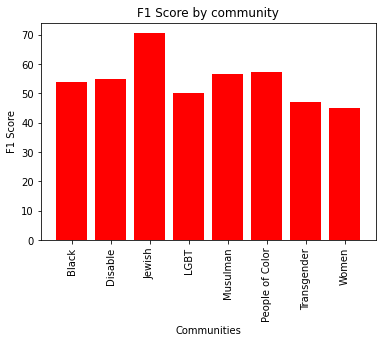

In [90]:
Multi_Graph_categories = {
'Disable' : F1Score_disable_graph,
'Women' : F1Score_women_graph,
'LGBT' : F1Score_LGBT_graph,
'Black' : F1Score_Black_graph,
'Musulman' : F1Score_Musulman_graph,
'Transgender' : F1Score_Transgender_graph,
'Jewish' : F1Score_Jewish_graph,
'People of Color' : F1Score_PeopleofColor_graph
}

lists = sorted(Multi_Graph_categories.items()) # sorted by key, return a list of tuples
communities, numb_of_samples = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(communities, numb_of_samples, color='r')
plt.title('F1 Score by community')
plt.xlabel('Communities')
plt.ylabel('F1 Score')

In [91]:
Multi_Graph_categories

{'Disable': 55.00000000000001,
 'Women': 45.16129032258064,
 'LGBT': 50.0,
 'Black': 53.987730061349694,
 'Musulman': 56.75675675675676,
 'Transgender': 47.05882352941176,
 'Jewish': 70.58823529411765,
 'People of Color': 57.14285714285714}

# Graph F1 Score Uni / Multi / All

In [92]:
uniFrame_TN = TN[TN['Multi/Uni'] == 'uni']
uniFrame_FN = FN[FN['Multi/Uni'] == 'uni']
uniFrame_FP = FP[FP['Multi/Uni'] == 'uni']

MultiFrame_TN = TN[TN['Multi/Uni'] == 'multi']
MultiFrame_FN = FN[FN['Multi/Uni'] == 'multi']
MultiFrame_FP = FP[FP['Multi/Uni'] == 'multi']

Uni

In [93]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_uni = len(uniFrame_TN) / (len(uniFrame_TN) + len(uniFrame_FN))
print( "The uni precision score is:", precision_uni)

The uni precision score is: 0.2871287128712871


In [94]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_uni = len(uniFrame_TN) / (len(uniFrame_TN) + len(uniFrame_FP))
print("The uni recall score is:", recall_uni)

The uni recall score is: 0.4142857142857143


In [95]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_uni = (2 * precision_uni * recall_uni) / (precision_uni + recall_uni)
print("The Uni F1 score is:", F1Score_uni)

The Uni F1 score is: 0.3391812865497076


Multi

In [96]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Multi = len(MultiFrame_TN) / (len(MultiFrame_TN) + len(MultiFrame_FN))
print( "The uni precision score is:", precision_Multi)

The uni precision score is: 0.6385964912280702


In [97]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Multi = len(MultiFrame_TN) / (len(MultiFrame_TN) + len(MultiFrame_FP))
print("The uni recall score is:", recall_Multi)

The uni recall score is: 0.42424242424242425


In [98]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Multi = (2 * precision_Multi * recall_Multi) / (precision_Multi + recall_Multi)
print("The Uni F1 score is:", F1Score_Multi)

The Uni F1 score is: 0.5098039215686274


In [99]:
F1Score_uni = F1Score_uni * 100
F1Score_multi = F1Score_Multi * 100
F1Score_all = F1Score * 100

Text(0, 0.5, 'F1 Score')

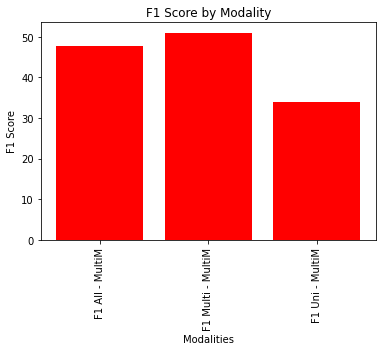

In [100]:
Multi_F1_score = {
    'F1 Uni - MultiM' : F1Score_uni,
    'F1 Multi - MultiM' : F1Score_multi,
    'F1 All - MultiM' : F1Score_all
}

lists = sorted(Multi_F1_score.items()) # sorted by key, return a list of tuples
communities, numb_of_samples = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(communities, numb_of_samples, color='r')
plt.title('F1 Score by Modality')
plt.xlabel('Modalities')
plt.ylabel('F1 Score')

In [101]:
Multi_F1_score

{'F1 Uni - MultiM': 33.91812865497076,
 'F1 Multi - MultiM': 50.98039215686274,
 'F1 All - MultiM': 47.68361581920904}